ZOMATO RESTAURENT NAMES AND METADATA



In [1]:
#importing the important libraries to data analysis



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS



In [2]:
#reading the file 

df=pd.read_csv("/content/drive/My Drive/csv files/Zomato Restaurant names and Metadata.csv")
#df=pd.read_csv("Zomato Restaurant names and Metadata.csv")
print(df)

                                       Name  \
0                           Beyond Flavours   
1                                  Paradise   
2                                  Flechazo   
3            Shah Ghouse Hotel & Restaurant   
4                Over The Moon Brew Company   
..                                      ...   
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
0    https://www.zomato.com/hyderabad/beyond-flavou...    800   
1    https://www.zomato.com/hyderabad/paradise-gach...    800   
2    https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3    https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4    https://www.zomato.com/hyderabad/over-the-moon...  1,200   
..                                           

In [3]:
#exploring the data

print(df.head(6))
print(df.tail())
print(df.columns)
print(df.describe)
print(df.info)


#analyzing the columns in the data set

print(df['Collections'],df['Cost'],df['Links'])


#shape of the data

print(df.shape)

#datatypes in the data columns

print(df.dtypes)



                             Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   
5           The Fisherman's Wharf   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   
5  https://www.zomato.com/hyderabad/the-fisherman...  1,500   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pub

In [4]:
#data cleaning in the dataset

#identifyting the missing values in the dataset

print(df.isna().sum())

#replacing the missing data


df['Collections'].fillna(value='Not specified',inplace=True)


#rows with missing values

df.dropna(inplace=True)


#columns with missing values 

df.dropna(inplace=True,axis=1)

#duplicates replacing

df.drop_duplicates(inplace=True)

#saving the data set after doing the data cleaning

df.to_csv("cleaned_zomatodataset.csv",index=False)

print(df.shape)

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64
(104, 6)


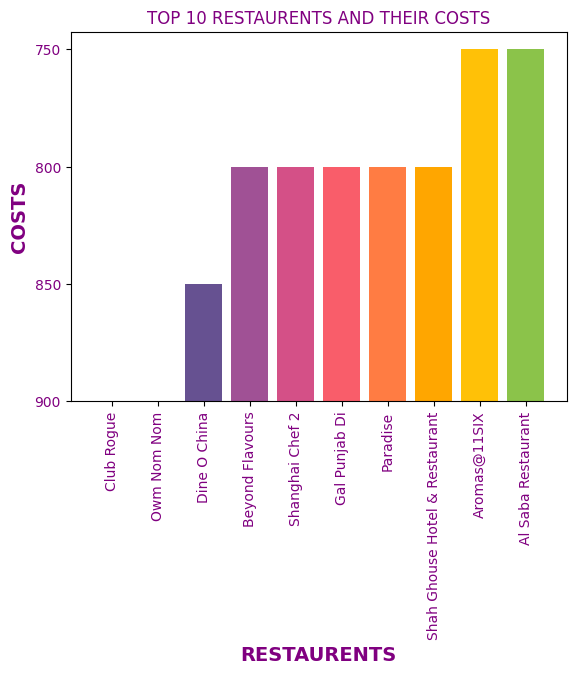

<Figure size 1000x600 with 0 Axes>

In [5]:
#visualizing the data using the python libraries 

#plotting the bar chart to analyze the no of restaurents in the dataset


#sorting the data according to the costs  in decending order

sort=df.sort_values('Cost',ascending=False)

#selecting the top 10 restaurents

top=sort.head(10)

#plotting the bar chart 

plt.bar(top['Name'],top['Cost'],color=['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600', '#FFC107', '#8BC34A'])

plt.title("TOP 10 RESTAURENTS AND THEIR COSTS",color='purple')

plt.xlabel("RESTAURENTS",color='purple',fontsize=14,fontweight='bold')

plt.ylabel("COSTS",color='purple',fontsize=14,fontweight='bold')

plt.xticks(rotation=90,color='purple')

plt.yticks(color='purple')

plt.figure(figsize=(10,6))

plt.show()


<ipython-input-6-bd23823852f7>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weekday_counts = weekday_counts.append({'name': name, 'weekday': counts.index[i], 'count': counts[i]}, ignore_index=True)
<ipython-input-6-bd23823852f7>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weekday_counts = weekday_counts.append({'name': name, 'weekday': counts.index[i], 'count': counts[i]}, ignore_index=True)
<ipython-input-6-bd23823852f7>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weekday_counts = weekday_counts.append({'name': name, 'weekday': counts.index[i], 'count': counts[i]}, ignore_index=True)
<ipython-input-6-bd23823852f7>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

<Axes: xlabel='weekday', ylabel='name'>

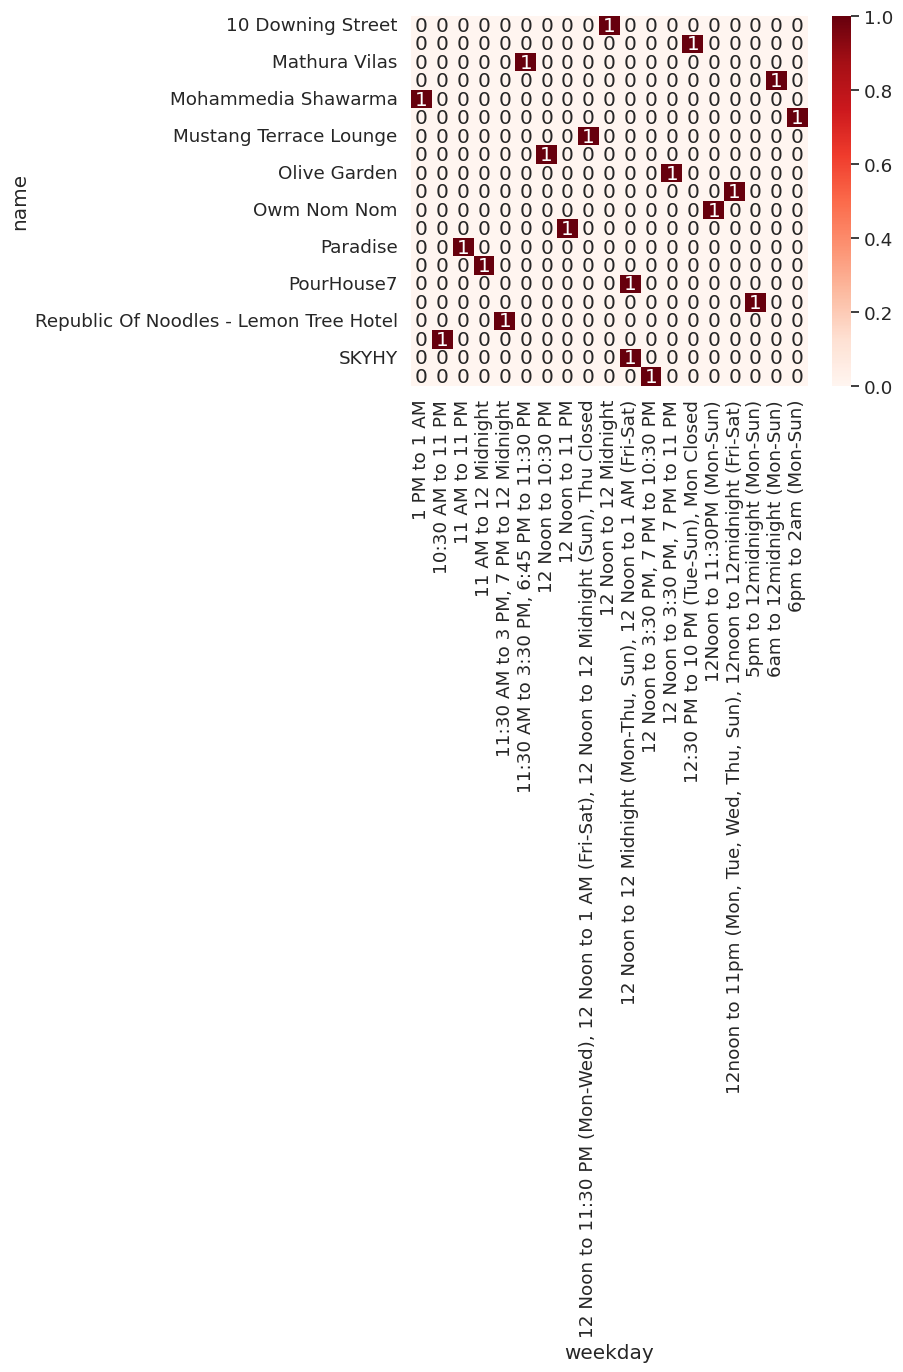

In [6]:
name_counts = df.groupby('Name')['Name'].count().reset_index(name='count')

# sorting the dataframe by the count in descending order
name_counts = name_counts.sort_values(by='count', ascending=False)

# e top 20 most frequent restaurant names
top_20_names = name_counts.head(20)['Name'].tolist()

#  new dataframe with columns 'name', 'weekday', and 'count'
weekday_counts = pd.DataFrame(columns=['name', 'weekday', 'count'])

for name in top_20_names:
    temp_df = df[df['Name']==name]
    counts = temp_df['Timings'].value_counts().sort_index()
    for i in range(len(counts)):
        weekday_counts = weekday_counts.append({'name': name, 'weekday': counts.index[i], 'count': counts[i]}, ignore_index=True)

# pivot table to reshape the data
heatmap_data = weekday_counts.pivot_table(index='name', columns='weekday', values='count', aggfunc='sum', fill_value=0)

#  heatmap using seaborn
sns.set(font_scale=1.2)
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='g')

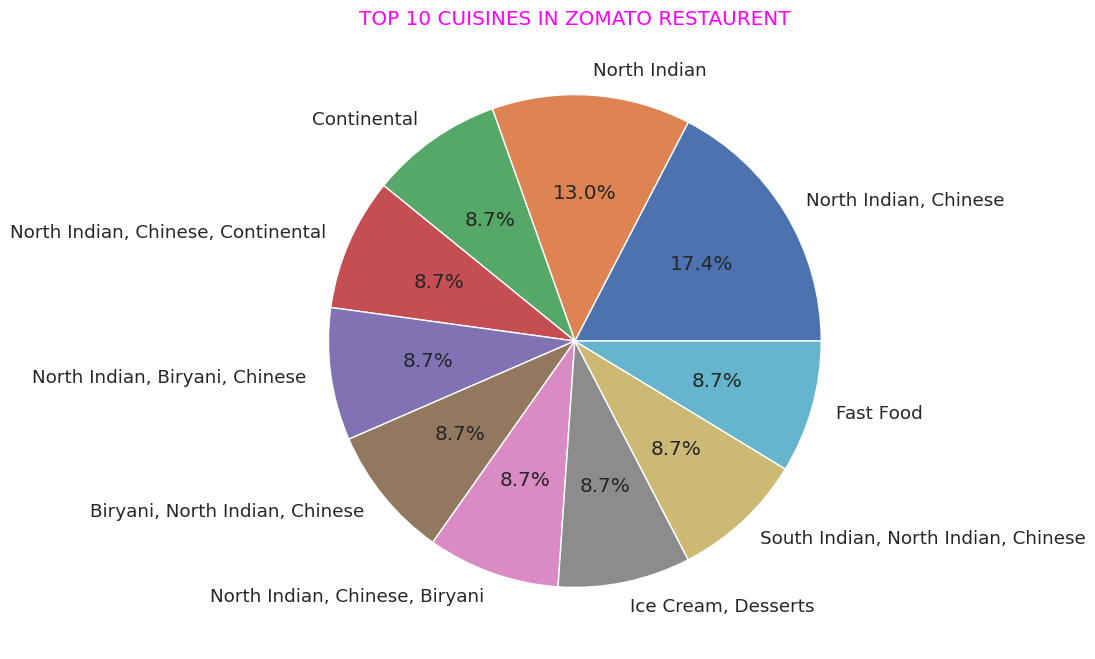

In [7]:
#piechart visualization
#arranging the data in the descending order and counting the restaurents in the each cuisine

c=df.groupby('Cuisines').size().sort_values(ascending=False)

#fixing the figure size

plt.figure(figsize=(10,8))

#plotting the pie chart

plt.pie(c.values[:10],labels=c.index[:10],autopct='%1.1f%%')

plt.title('TOP 10 CUISINES IN ZOMATO RESTAURENT',color='Magenta')

plt.show()

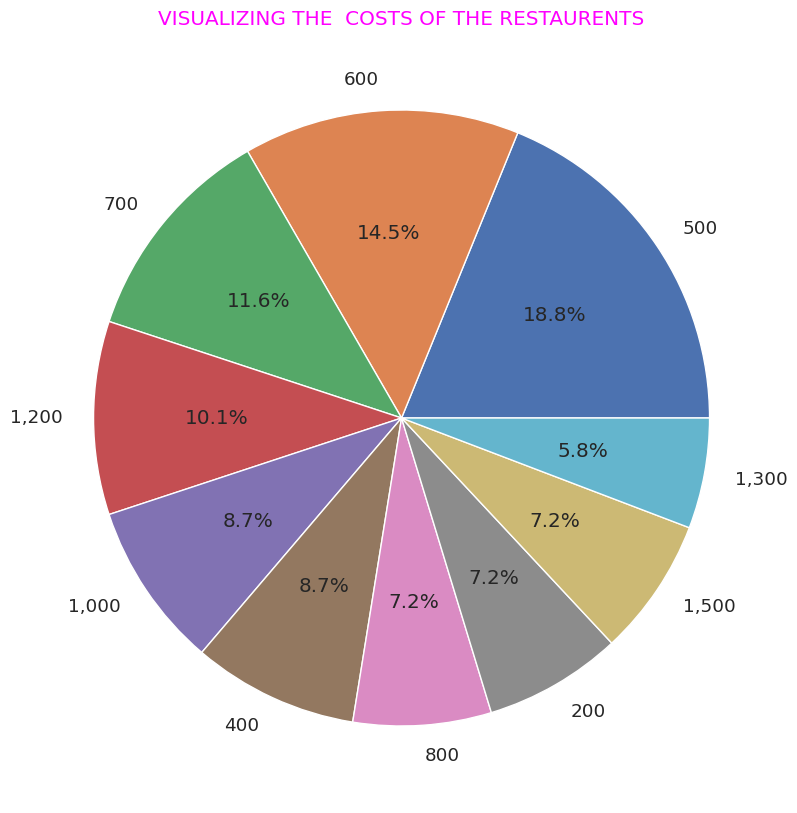

In [8]:
#piechart visualization


c=df.groupby('Cost').size().sort_values(ascending=False)

#fixing the figure size

plt.figure(figsize=(10,10))

#plotting the pie chart

plt.pie(c.values[:10],labels=c.index[:10],autopct='%1.1f%%')

plt.title('VISUALIZING THE  COSTS OF THE RESTAURENTS',color='Magenta')

plt.show()

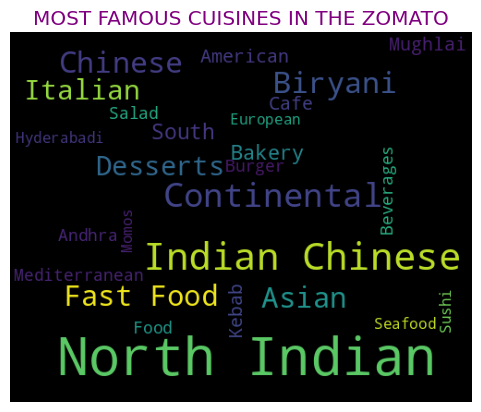

In [9]:
#top cusines names by the word cloud

#concating the names of the cuisines namaes in to single string 

name=' '.join(df['Cuisines'])

#setting the stopwords to remove unwanted words in tha data cuisnes

sw=set(STOPWORDS)

#forming the word cloud 

wc=WordCloud(height=400,width=500,background_color='black',max_words=100,stopwords=sw,random_state=40,min_font_size=15).generate(name)

#plotting the word cloud


plt.imshow(wc)

#title
plt.title('MOST FAMOUS CUISINES IN THE ZOMATO',color='purple')

plt.axis('off')

plt.show()





900.0
150.0
0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

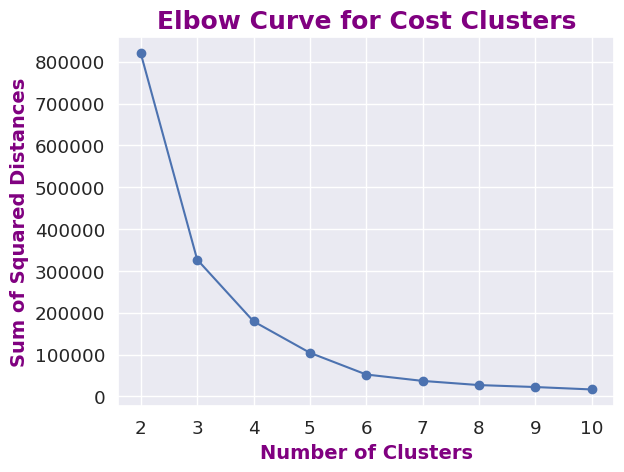

In [10]:
#creating the cost clusters 

#importing the important libraries 

from sklearn.cluster import KMeans

#converting the cost column in to numeric value

df['Cost']=pd.to_numeric(df['Cost'],errors='coerce')

#dropping the missing values

df.dropna(subset=['Cost'],inplace=True)

#converting the -inf to get possible outcome

print(df['Cost'].max())
print(df['Cost'].min())

print(df['Cost'].isnull().sum())
min=df['Cost'][df['Cost']>=0].min()
df.loc[df['Cost']==float('-inf'),'Cost']=min

#reshaping the column

costs=df['Cost'].values.reshape(-1,1)

#defining the range

c=range(2,11)

wscc=[]

for i  in c:
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(costs)
  wscc.append(kmeans.inertia_)

plt.plot(c,wscc, '-o')
plt.xlabel('Number of Clusters',fontweight='bold',color='purple',fontsize=14)
plt.ylabel('Sum of Squared Distances',fontweight='bold',color='purple',fontsize=14)
plt.title('Elbow Curve for Cost Clusters',fontsize=18,fontweight='bold',color='purple')
plt.show()






/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


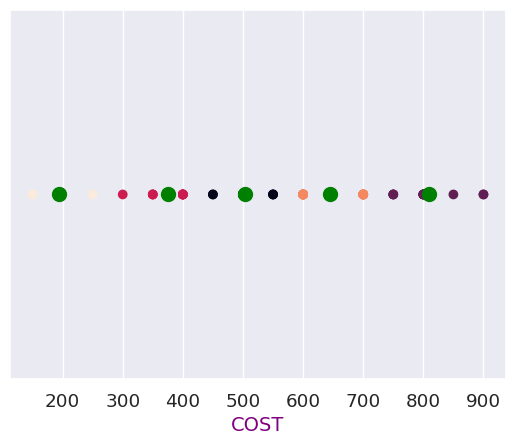

The silhouette score is 0.55
cost_cluster
0    502.777778
1    809.090909
2    375.000000
3    644.736842
4    193.750000
Name: Cost, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
#fitting the data after the optimal number of clusters

kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42).fit(df[['Cost']])
labels=kmeans.labels_


#plotting the clusters 

plt.scatter(df['Cost'],[0]*len(df),c=labels)

plt.scatter(kmeans.cluster_centers_[:,0],[0]*len(kmeans.cluster_centers_),c='green',s=100,marker='o')

plt.xlabel('COST',fontsize=14,color='purple')

plt.yticks([])

plt.show()

#calculating the silhouette score

from sklearn.metrics import silhouette_score as sc

from sklearn.datasets import make_blobs as mb

#generating a random data set

x,y=mb(n_samples=1000,centers=5,random_state=0)

kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0).fit(x)

score=sc(x,kmeans.labels_,metric='euclidean')

print(f"The silhouette score is {score:.2f}")

# Add a new column to the DataFrame with the cluster labels

df['cost_cluster'] = labels

print(df.groupby('cost_cluster')['Cost'].mean())






missing values are 0


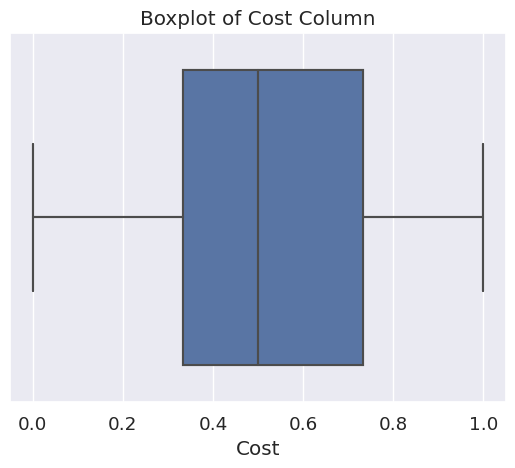

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
#using the hierarchical algorithm for the data analysis

#prepocess the data before using the algorithm 
from sklearn.preprocessing import MinMaxScaler as ms

#selecting the cost column

df['Cost']=pd.to_numeric(df['Cost'],errors='coerce')

df['Cost']=df['Cost'].astype(str)

#finding the mising values in the data

df['Cost'].str.replace(',',' ')

#missing values
miss=df['Cost'].isnull().sum()

print("missing values are",miss)

med=df['Cost'].median()


df['Cost'].fillna(value=med,inplace=True)

#df.dropna(subset=['Cost'],inplace=True)
                  
#normalize the data 

scaler=ms()

df['Cost']=scaler.fit_transform(df[['Cost']])

#checking for the outliers

sns.boxplot(x=df['Cost'])

sns.boxplot(x=df['Cost'])
plt.title("Boxplot of Cost Column")
plt.show()

# Removing outliers
q1, q3 = np.percentile(df['Cost'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
zd = [(df['Cost'] >= lower_bound) & (df['Cost'] <= upper_bound)]

# Transforming the cost column using a logarithmic transformation
df['Cost'] = np.log(df['Cost'])











0.0
-inf
0


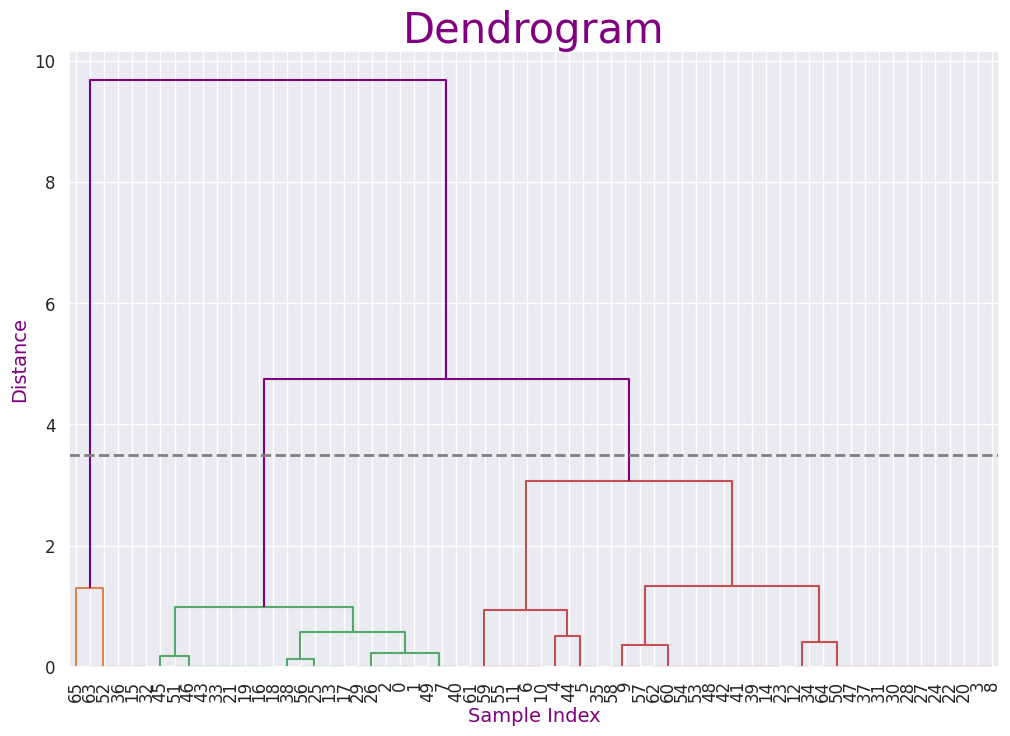

      count  mean  std  min  25%  50%  75%  max
Cost                                           
1       6.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
2      22.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
3      38.0   3.0  0.0  3.0  3.0  3.0  3.0  3.0


In [13]:
#using the hierarchical algorithm

#importing the libraries

from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

from sklearn.preprocessing import StandardScaler as ss

from matplotlib.ticker import ScalarFormatter

from sklearn.decomposition import PCA

import re

#extracting thr cost column

cost_data=df['Cost']

#converting the -inf to get possible outcome

print(df['Cost'].max())
print(df['Cost'].min())

print(df['Cost'].isnull().sum())
min=df['Cost'][df['Cost']>=0].min()
df.loc[df['Cost']==float('-inf'),'Cost']=min

df.replace([np.inf,-np.inf],np.nan,inplace=True)
df.fillna(value=1e9,inplace=True)

n=df.select_dtypes(include=np.number).columns.tolist()

# standardization of the data
scaler=ss()

cost = scaler.fit_transform(cost_data.values.reshape(-1, 1))



#perform as pca

pca=PCA(n_components=2)

pca_data=scaler.fit_transform(cost)

#hierarchical clustering using the wards method(to decrease the total variance with in the cluster)

z=linkage(cost,'ward')

#plotting the dendogram to determine the optimal number of clusters

plt.figure(figsize=(12,8))

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Sample Index', fontsize=14,color='purple')
plt.ylabel('Distance', fontsize=14,color='purple')
plt.title('Dendrogram',fontsize=30,color='purple')
plt.xticks(rotation=0,fontsize=10)
dendrogram(z,leaf_rotation=90,leaf_font_size=8,color_threshold=3.5,above_threshold_color='purple')
plt.axhline(y=3.5,color='gray',lw=2,linestyle='--')
#plt.clf()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()



#determing the optimal number of clusters

max_d=3.5#distance between teh clusters
c=fcluster(z,max_d,criterion='distance')

#adding thr clusters into the original data set
df['Cost']=c

#displaying the clusters
print(df.groupby('Cost')['Cost'].describe())







In [14]:
#converting the cost volumn into numeric

df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')

df.fillna(0,inplace=True)

print(df.columns)



Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'cost_cluster'],
      dtype='object')


USING THE ASSOCIATION MINING RULE FOR THE DATA


In [15]:
#importing the important libraries for the analysis

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df.dropna(inplace=True)

df.fillna(0,inplace=True)


#creating a binary matrix for restaurents offer each cuisine

cm = pd.DataFrame(0, index=df.index, columns=sorted(set(c for cs in df['Cuisines'].str.split(', ') for c in cs)))

for i ,cs in enumerate(df['Cuisines'].str.split(',')):
  for c in cs:
    cm.loc[i,c]=1

cm=cm.loc[:,(cm!=0).any(axis=0)]

cm.fillna(0,inplace=True)


#applying the apriori algorithm for the frequent itemsets




f=apriori(cm,min_support=0.01,use_colnames=True)

r=association_rules(f,metric='lift',min_threshold=1)

r.sort_values(by='lift',ascending=False,inplace=True)

print(r.head(10))

                                 antecedents  \
1357             (North Indian,  Hyderabadi)   
1708         ( Cafe,  Fast Food,  Beverages)   
1064              ( European,  South Indian)   
430                              ( European)   
1067                             ( European)   
427                 (Chinese,  South Indian)   
1424              ( North Indian,  European)   
1072  (Chinese,  North Indian,  Continental)   
1653  (Chinese,  Continental,  South Indian)   
1076                 (Chinese,  Continental)   

                                 consequents  antecedent support  \
1357                    ( Biryani,  Seafood)             0.01087   
1708                     ( Burger, Desserts)             0.01087   
1064                 (Chinese,  Continental)             0.01087   
430                 (Chinese,  South Indian)             0.01087   
1067  (Chinese,  Continental,  South Indian)             0.01087   
427                              ( European)             0.0108